In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import sklearn
from sklearn.datasets import load_boston
boston=load_boston()


In [3]:
#We print the value of the boston_dataset to understand what it contains. print(boston_dataset.keys()) gives
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
#To know more about the features use boston_dataset.DESCR The description of all the features is given below:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### The prices of the house indicated by the variable MEDV is our target variable and the remaining are the feature variables based on which we will predict the value of a house.

In [7]:
#We will now load the data into a pandas dataframe using pd.DataFrame. We then print the first 5 rows of the data using head()
bos=pd.DataFrame(boston.data,columns=boston.feature_names)
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.

In [8]:
bos["MEDV"]=boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Data preprocessing
After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [10]:
bos.isnull().sum()
#However, there are no missing values in this dataset as shown below.

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Exploratory Data Analysis
Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.
Let’s first plot the distribution of the target variable MEDV. We will use the distplot function from the seaborn library.

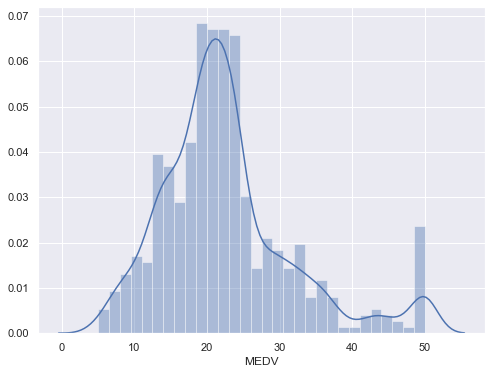

In [12]:
sns.set(rc={"figure.figsize":(8,6)})
sns.distplot(bos["MEDV"], bins=30)
plt.show()


#### We see that the values of MEDV are distributed normally with few outliers.
Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.

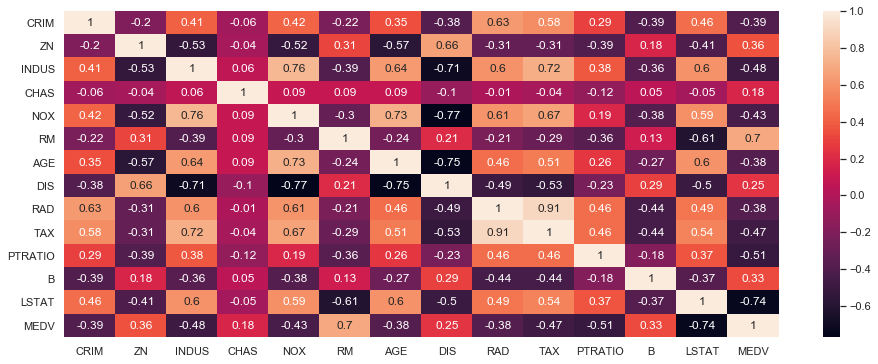

In [14]:
plt.figure(figsize=(16,6))
correlation_matrix=bos.corr().round(2)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

#### Observations:
To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7) where as LSTAT has a high negative correlation with MEDV(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Check this for an explanation. Same goes for the features DIS and AGE which have a correlation of -0.75.

Based on the above observations we will analyse RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.

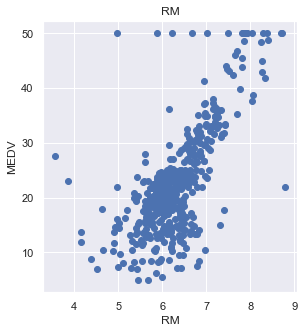

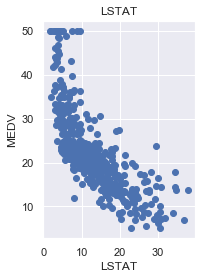

In [21]:
plt.figure(figsize=(10,5))

features=["RM", "LSTAT"]
target=bos["MEDV"]

for i,col in enumerate(features):
    plt.subplot(1,len(features),i+1)
    x=bos[col]
    y=target
    plt.scatter(x,y, marker="o")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("MEDV")
    plt.show()

#### Observations:
The prices increase as the value of RM increases linearly. There are few outliers and the data seems to be capped at 50.
The prices tend to decrease with an increase in LSTAT. Though it doesn’t look to be following exactly a linear line.

### We concatenate the LSTAT and RM columns using np.c_ provided by the numpy library.

In [23]:
x=pd.DataFrame(np.c_[bos["LSTAT"], bos["RM"]], columns=["LSTAT","RM"])
y=bos["MEDV"]
x

,LSTAT,RM
0,4.98,6.575
1,9.14,6.421
2,4.03,7.185
3,2.94,6.998
4,5.33,7.147
...,...,...
501,9.67,6.593
502,9.08,6.120
503,5.64,6.976
504,6.48,6.794


### Splitting the data into training and testing sets
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2, random_state=5)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 2)
(404,)
(102, 2)
(102,)


We use scikit-learn’s LinearRegression to train our model on both the training and test sets.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LM=LinearRegression()
LM.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model evaluation
We will evaluate our model using RMSE and R2-score.

In [36]:
Y_train_predict=LM.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2_train=LM.score(X_train,Y_train)
Y_test_predict=LM.predict(X_test)
rmse1=(np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2_test=LM.score(X_test,Y_test)
      
print("The root mean squared error of the training dataset is ", rmse)
print("The r2 score of the training dataset is ",r2_train)
print("-"*20)
print("The root mean squared error of the test dataset is ", rmse1)
print("The r2 score of the test dataset is ",r2_test)
      

The root mean squared error of the training dataset is  5.6371293350711955
The r2 score of the training dataset is  0.6300745149331701
--------------------
The root mean squared error of the test dataset is  5.137400784702911
The r2 score of the test dataset is  0.6628996975186953
